In [ ]:
"""
Day 1
Jack and I figured out a platform where we can use realtime collaboration to simultaneously work on our Python code. It's a pretty epic combination between Jupyter Notebooka and Google Docs TBH
"""

"\nDay 1\nJack and I figured out a platform where we can use realtime collaboration to simultaneously work on our Python code. It's a pretty epic combination between Jupyter Notebooka and Google Docs TBH\n"

In [ ]:
#GAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sunspots = pd.read_csv('sunspots_data.csv')
sunspots

In [ ]:
x = np.linspace(1749.0, 1984.0, 2820, 1/12).reshape(-1, 1)
y = sunspots['Sunspots'].to_numpy()

(array([1700., 1750., 1800., 1850., 1900., 1950., 2000.]),
 [Text(1700.0, 0, '1700'),
  Text(1750.0, 0, '1750'),
  Text(1800.0, 0, '1800'),
  Text(1850.0, 0, '1850'),
  Text(1900.0, 0, '1900'),
  Text(1950.0, 0, '1950'),
  Text(2000.0, 0, '2000')])

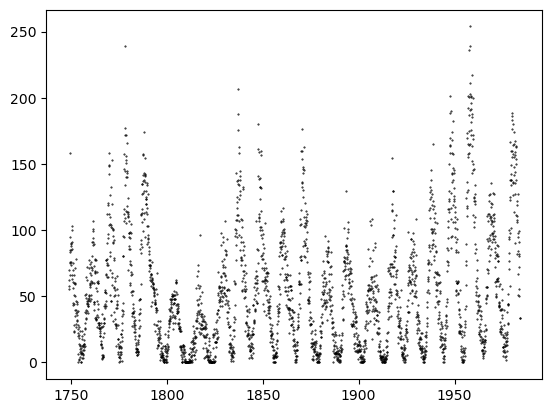

In [ ]:
plt.scatter(x, y, c='k', s = 0.2)
plt.xticks()

In [ ]:
'''from sklearn.gaussian_process.kernels import RBF

long_term_trend_kernel = 50.0**2 * RBF(length_scale=50.0)'''

'from sklearn.gaussian_process.kernels import RBF\n\nlong_term_trend_kernel = 50.0**2 * RBF(length_scale=50.0)'

In [ ]:
from sklearn.gaussian_process.kernels import RBF

long_term_trend_kernel = 1.0**2 * RBF(length_scale=1.0)

In [ ]:
from sklearn.gaussian_process.kernels import ExpSineSquared
sub_kernel = (
    2.0**2
    * RBF(length_scale=50.0)
    * ExpSineSquared(length_scale=12.5, periodicity=12.5)
)

In [ ]:
from sklearn.gaussian_process.kernels import RationalQuadratic

irregularities_kernel = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)

In [ ]:
from sklearn.gaussian_process.kernels import WhiteKernel

noise_kernel = 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(
    noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5)
)

In [ ]:
main_kernel = (
    sub_kernel + long_term_trend_kernel + irregularities_kernel + noise_kernel
)

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

y_mean = y.mean()
gaussian_process = GaussianProcessRegressor(kernel=main_kernel, normalize_y=False)
gaussian_process.fit(x, y - y_mean)

In [ ]:
import datetime
import numpy as np

today = datetime.datetime.now()
current_month = today.year + today.month / 12
X_test = np.linspace(start=1749, stop=current_month, num=2820).reshape(-1, 1)
sunnum_pred, std_sunnum_pred = gaussian_process.predict(X_test, return_std=True)

Text(0, 0.5, 'Sunspot Count')

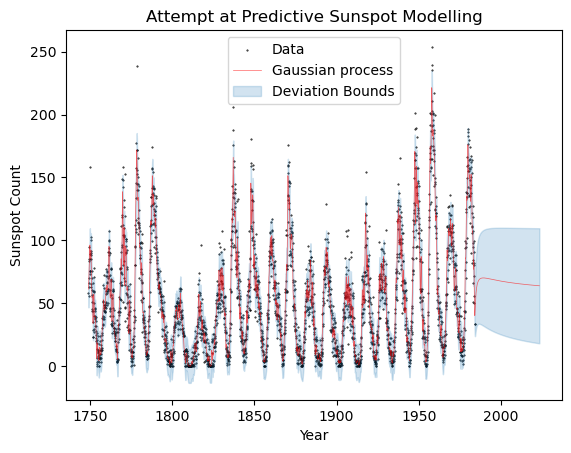

In [ ]:
plt.scatter(x, y, color="black", s=0.2, label="Data")
plt.plot(X_test, sunnum_pred + y_mean, color="red", alpha=0.6, label="Gaussian process", linewidth = 0.5)
plt.fill_between(
    X_test.ravel(),
    sunnum_pred - std_sunnum_pred + y_mean,
    sunnum_pred + std_sunnum_pred + y_mean, 
    color="tab:blue",
    alpha=0.2,
    label = "Deviation Bounds"
)
plt.legend()
plt.title("Attempt at Predictive Sunspot Modelling")
plt.xlabel("Year")
plt.ylabel("Sunspot Count")
